In [1]:
# importing python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from anndata import read_h5ad
from anndata import read_csv
import anndata
from plotnine import * 
from plotnine.data import mtcars
import venn
from scipy import stats
import seaborn as sns
from scipy.stats import spearmanr
from scipy.sparse import csr_matrix
import math
from scipy.stats import pearsonr
from lifelines import KaplanMeierFitter
import researchpy as rp
from lifelines.statistics import logrank_test

%matplotlib inline
sc.logging.print_header()

scanpy==1.8.1 anndata==0.7.5 umap==0.5.1 numpy==1.21.0 scipy==1.6.2 pandas==1.2.3 scikit-learn==0.23.2 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0 leidenalg==0.8.2 pynndescent==0.5.2


# metabric

In [2]:
metabric_gc = pd.read_csv('METABRIC/data_mRNA_median_all_sample_Zscores.txt', delimiter = "\t",index_col=0)
metabric_gc

,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,MB-0316,...,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
RERE,473.0,-0.7082,1.2179,0.0168,-0.4248,0.4916,0.5156,-1.2105,-0.9309,-0.2677,...,-0.5452,-0.4450,1.8429,1.1092,1.1871,-1.8702,1.1299,0.0481,-0.3357,-1.2562
RNF165,494470.0,-0.4419,0.4140,-0.6843,-1.1139,-0.6875,-0.2522,-0.4124,-0.0023,-0.8910,...,0.9537,-1.1564,0.9563,0.0470,-0.2570,3.2290,1.3609,0.6291,0.2281,0.6051
CD049690,NaN,0.2236,0.2255,0.5691,0.3545,0.7865,-0.3715,1.9356,-0.1612,1.0461,...,-0.5783,-0.4329,0.5928,-1.0796,0.1163,-0.0018,0.8035,-0.6178,1.0327,0.8558
BC033982,NaN,-2.1485,0.4763,-0.2446,0.2618,-0.2695,-0.8391,-0.6770,0.9853,0.4264,...,0.1445,-3.1854,-2.2533,1.1311,0.4819,-2.5749,-1.6314,-0.8435,-1.0429,-0.1023
PHF7,51533.0,-0.3220,-1.0921,0.2830,-0.2864,0.0772,-0.4976,-0.6453,-0.0506,-0.1191,...,-0.9190,-0.0539,0.7454,0.1631,0.8931,-0.9482,-0.0397,0.5491,-0.0115,4.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC2D1A,54862.0,0.0174,-0.7659,0.0632,0.2637,-0.4725,-0.6109,-1.2341,0.5291,0.9261,...,-0.8405,-0.5942,-1.1513,-0.5468,0.3085,-0.2758,2.4660,-0.8448,-0.1119,4.0234
CB986545,NaN,-3.4444,0.1327,1.1914,-0.7616,-0.1706,0.0067,1.8107,-0.4128,-0.5614,...,0.0452,-2.4145,0.2025,-0.4596,0.2272,0.2825,-0.5914,0.9188,-2.3648,2.7308
IGSF9,57549.0,0.4401,1.2807,0.8163,-0.1299,-0.2239,-1.0028,1.8372,-0.6808,0.2143,...,-0.4784,-0.6108,-1.6488,-1.2576,0.4929,0.4175,0.3618,0.8376,-0.5499,0.6224


In [3]:
metabric_gc = metabric_gc.drop(columns=['Entrez_Gene_Id'])
metabric_gc

,MB-0362,MB-0346,MB-0386,MB-0574,MB-0503,MB-0641,MB-0201,MB-0218,MB-0316,MB-0189,...,MB-6122,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
RERE,-0.7082,1.2179,0.0168,-0.4248,0.4916,0.5156,-1.2105,-0.9309,-0.2677,-0.2058,...,-0.5452,-0.4450,1.8429,1.1092,1.1871,-1.8702,1.1299,0.0481,-0.3357,-1.2562
RNF165,-0.4419,0.4140,-0.6843,-1.1139,-0.6875,-0.2522,-0.4124,-0.0023,-0.8910,0.1057,...,0.9537,-1.1564,0.9563,0.0470,-0.2570,3.2290,1.3609,0.6291,0.2281,0.6051
CD049690,0.2236,0.2255,0.5691,0.3545,0.7865,-0.3715,1.9356,-0.1612,1.0461,-0.0902,...,-0.5783,-0.4329,0.5928,-1.0796,0.1163,-0.0018,0.8035,-0.6178,1.0327,0.8558
BC033982,-2.1485,0.4763,-0.2446,0.2618,-0.2695,-0.8391,-0.6770,0.9853,0.4264,0.7944,...,0.1445,-3.1854,-2.2533,1.1311,0.4819,-2.5749,-1.6314,-0.8435,-1.0429,-0.1023
PHF7,-0.3220,-1.0921,0.2830,-0.2864,0.0772,-0.4976,-0.6453,-0.0506,-0.1191,-1.3048,...,-0.9190,-0.0539,0.7454,0.1631,0.8931,-0.9482,-0.0397,0.5491,-0.0115,4.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC2D1A,0.0174,-0.7659,0.0632,0.2637,-0.4725,-0.6109,-1.2341,0.5291,0.9261,-0.2998,...,-0.8405,-0.5942,-1.1513,-0.5468,0.3085,-0.2758,2.4660,-0.8448,-0.1119,4.0234
CB986545,-3.4444,0.1327,1.1914,-0.7616,-0.1706,0.0067,1.8107,-0.4128,-0.5614,-0.4614,...,0.0452,-2.4145,0.2025,-0.4596,0.2272,0.2825,-0.5914,0.9188,-2.3648,2.7308
IGSF9,0.4401,1.2807,0.8163,-0.1299,-0.2239,-1.0028,1.8372,-0.6808,0.2143,0.2230,...,-0.4784,-0.6108,-1.6488,-1.2576,0.4929,0.4175,0.3618,0.8376,-0.5499,0.6224


In [4]:
metabric_gc = metabric_gc.T
metabric_gc

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A
MB-0362,-0.7082,-0.4419,0.2236,-2.1485,-0.3220,0.0543,-0.7462,-0.4045,0.7777,0.9160,...,-0.8405,1.1698,0.1744,-0.2875,-0.5855,0.0174,-3.4444,0.4401,-1.0021,-1.1375
MB-0346,1.2179,0.4140,0.2255,0.4763,-1.0921,-1.1534,0.0709,0.5118,-0.5187,-0.5652,...,1.5500,-0.1237,0.4005,0.3579,-0.4784,-0.7659,0.1327,1.2807,0.4464,0.0515
MB-0386,0.0168,-0.6843,0.5691,-0.2446,0.2830,2.9594,-0.6240,-0.3849,0.6866,0.1819,...,-1.2062,-1.0774,0.6514,0.4954,6.6421,0.0632,1.1914,0.8163,-1.1240,0.6751
MB-0574,-0.4248,-1.1139,0.3545,0.2618,-0.2864,-0.2218,2.0556,0.6358,-1.1241,-0.0056,...,-1.4270,0.8899,0.2843,0.2636,1.1931,0.2637,-0.7616,-0.1299,-2.2013,-0.3418
MB-0503,0.4916,-0.6875,0.7865,-0.2695,0.0772,1.3167,1.0234,-1.1173,-1.2839,0.4709,...,-0.3548,-0.0570,0.1997,-0.1589,0.4032,-0.4725,-0.1706,-0.2239,-0.5352,-1.2383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-5465,-1.8702,3.2290,-0.0018,-2.5749,-0.9482,-0.7480,-0.9970,-0.7084,0.0308,0.2833,...,-0.2990,0.0178,0.0864,-0.3993,0.2846,-0.2758,0.2825,0.4175,-0.2139,-0.2247
MB-5453,1.1299,1.3609,0.8035,-1.6314,-0.0397,-0.4148,0.6253,-1.4118,-0.3099,-1.1722,...,0.2396,0.3383,-1.1329,-1.6279,0.1113,2.4660,-0.5914,0.3618,1.1136,0.5676
MB-5471,0.0481,0.6291,-0.6178,-0.8435,0.5491,0.0319,0.5801,-2.7479,-0.6955,-0.1561,...,-0.0562,-0.5752,0.2625,-0.6451,0.1663,-0.8448,0.9188,0.8376,0.1193,-0.9348
MB-5127,-0.3357,0.2281,1.0327,-1.0429,-0.0115,-0.3778,2.2837,0.7290,0.6920,1.5252,...,-0.3520,-0.2708,-0.5835,-0.8356,-0.3435,-0.1119,-2.3648,-0.5499,1.7275,0.1988


In [8]:
metabric_gc_df = metabric_gc.loc[:,~metabric_gc.columns.duplicated()]

In [9]:
metabric_gc_df

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A
MB-0362,-0.7082,-0.4419,0.2236,-2.1485,-0.3220,0.0543,-0.7462,-0.4045,0.7777,0.9160,...,-0.8405,1.1698,0.1744,-0.2875,-0.5855,0.0174,-3.4444,0.4401,-1.0021,-1.1375
MB-0346,1.2179,0.4140,0.2255,0.4763,-1.0921,-1.1534,0.0709,0.5118,-0.5187,-0.5652,...,1.5500,-0.1237,0.4005,0.3579,-0.4784,-0.7659,0.1327,1.2807,0.4464,0.0515
MB-0386,0.0168,-0.6843,0.5691,-0.2446,0.2830,2.9594,-0.6240,-0.3849,0.6866,0.1819,...,-1.2062,-1.0774,0.6514,0.4954,6.6421,0.0632,1.1914,0.8163,-1.1240,0.6751
MB-0574,-0.4248,-1.1139,0.3545,0.2618,-0.2864,-0.2218,2.0556,0.6358,-1.1241,-0.0056,...,-1.4270,0.8899,0.2843,0.2636,1.1931,0.2637,-0.7616,-0.1299,-2.2013,-0.3418
MB-0503,0.4916,-0.6875,0.7865,-0.2695,0.0772,1.3167,1.0234,-1.1173,-1.2839,0.4709,...,-0.3548,-0.0570,0.1997,-0.1589,0.4032,-0.4725,-0.1706,-0.2239,-0.5352,-1.2383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-5465,-1.8702,3.2290,-0.0018,-2.5749,-0.9482,-0.7480,-0.9970,-0.7084,0.0308,0.2833,...,-0.2990,0.0178,0.0864,-0.3993,0.2846,-0.2758,0.2825,0.4175,-0.2139,-0.2247
MB-5453,1.1299,1.3609,0.8035,-1.6314,-0.0397,-0.4148,0.6253,-1.4118,-0.3099,-1.1722,...,0.2396,0.3383,-1.1329,-1.6279,0.1113,2.4660,-0.5914,0.3618,1.1136,0.5676
MB-5471,0.0481,0.6291,-0.6178,-0.8435,0.5491,0.0319,0.5801,-2.7479,-0.6955,-0.1561,...,-0.0562,-0.5752,0.2625,-0.6451,0.1663,-0.8448,0.9188,0.8376,0.1193,-0.9348
MB-5127,-0.3357,0.2281,1.0327,-1.0429,-0.0115,-0.3778,2.2837,0.7290,0.6920,1.5252,...,-0.3520,-0.2708,-0.5835,-0.8356,-0.3435,-0.1119,-2.3648,-0.5499,1.7275,0.1988


In [11]:
metabric_gc_df

Hugo_Symbol,RERE,RNF165,CD049690,BC033982,PHF7,CIDEA,PAPD4,AI082173,SLC17A3,SDS,...,BX115874,BX107598,UGCGL1,VPS72,CSMD3,CC2D1A,CB986545,IGSF9,DA110839,FAM71A
MB-0362,-0.7082,-0.4419,0.2236,-2.1485,-0.3220,0.0543,-0.7462,-0.4045,0.7777,0.9160,...,-0.8405,1.1698,0.1744,-0.2875,-0.5855,0.0174,-3.4444,0.4401,-1.0021,-1.1375
MB-0346,1.2179,0.4140,0.2255,0.4763,-1.0921,-1.1534,0.0709,0.5118,-0.5187,-0.5652,...,1.5500,-0.1237,0.4005,0.3579,-0.4784,-0.7659,0.1327,1.2807,0.4464,0.0515
MB-0386,0.0168,-0.6843,0.5691,-0.2446,0.2830,2.9594,-0.6240,-0.3849,0.6866,0.1819,...,-1.2062,-1.0774,0.6514,0.4954,6.6421,0.0632,1.1914,0.8163,-1.1240,0.6751
MB-0574,-0.4248,-1.1139,0.3545,0.2618,-0.2864,-0.2218,2.0556,0.6358,-1.1241,-0.0056,...,-1.4270,0.8899,0.2843,0.2636,1.1931,0.2637,-0.7616,-0.1299,-2.2013,-0.3418
MB-0503,0.4916,-0.6875,0.7865,-0.2695,0.0772,1.3167,1.0234,-1.1173,-1.2839,0.4709,...,-0.3548,-0.0570,0.1997,-0.1589,0.4032,-0.4725,-0.1706,-0.2239,-0.5352,-1.2383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-5465,-1.8702,3.2290,-0.0018,-2.5749,-0.9482,-0.7480,-0.9970,-0.7084,0.0308,0.2833,...,-0.2990,0.0178,0.0864,-0.3993,0.2846,-0.2758,0.2825,0.4175,-0.2139,-0.2247
MB-5453,1.1299,1.3609,0.8035,-1.6314,-0.0397,-0.4148,0.6253,-1.4118,-0.3099,-1.1722,...,0.2396,0.3383,-1.1329,-1.6279,0.1113,2.4660,-0.5914,0.3618,1.1136,0.5676
MB-5471,0.0481,0.6291,-0.6178,-0.8435,0.5491,0.0319,0.5801,-2.7479,-0.6955,-0.1561,...,-0.0562,-0.5752,0.2625,-0.6451,0.1663,-0.8448,0.9188,0.8376,0.1193,-0.9348
MB-5127,-0.3357,0.2281,1.0327,-1.0429,-0.0115,-0.3778,2.2837,0.7290,0.6920,1.5252,...,-0.3520,-0.2708,-0.5835,-0.8356,-0.3435,-0.1119,-2.3648,-0.5499,1.7275,0.1988


In [12]:
metabric_gc_df.T.to_csv('/mnt/ibm_sm/home/weilun/code/data/scBC_data/files/METABRIC/brca_metabric_gc.csv')

In [13]:
genes = [x for x in metabric_gc.columns.tolist() if str(x) != 'nan']

In [14]:
metabric_metadata_df = pd.read_csv('/mnt/ibm_sm/home/weilun/code/data/scBC_data/files/METABRIC/brca_metabric_clinical_data.tsv', delimiter="\t",index_col=0)
metabric_metadata_df = metabric_metadata_df.set_index('Sample ID')
metabric_metadata_df

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
Sample ID,,,,,,,,,,,,,,,,,,,,,
MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,1.0,Positve,...,YES,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,22.0,2.0,Living
MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,1.0,Positve,...,YES,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,10.0,1.0,Living
MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,1.0,Positve,...,NO,151.28,1:Recurred,1,Primary,Female,NaN,15.0,2.0,Died of Disease
MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,1.0,Positve,...,YES,162.76,0:Not Recurred,1,Primary,Female,NaN,25.0,2.0,Living
MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,1.0,Positve,...,YES,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MTS-T2428,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,4.93,1:Recurred,1,Primary,Female,NaN,27.0,1.0,NaN
MTS-T2429,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,16.18,1:Recurred,1,Primary,Female,NaN,28.0,2.0,NaN
MTS-T2430,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,Primary,Female,NaN,NaN,0.0,NaN


In [15]:
metabric_df_os = metabric_metadata_df[["Overall Survival (Months)", "Overall Survival Status"]]
metabric_df_os

,Overall Survival (Months),Overall Survival Status
Sample ID,,
MB-0000,140.500000,0:LIVING
MB-0002,84.633333,0:LIVING
MB-0005,163.700000,1:DECEASED
MB-0006,164.933333,0:LIVING
MB-0008,41.366667,1:DECEASED
...,...,...
MTS-T2428,NaN,NaN
MTS-T2429,NaN,NaN
MTS-T2430,NaN,NaN


In [16]:
metabric_df_os = metabric_df_os[metabric_df_os['Overall Survival Status'].isin([x for x in metabric_df_os['Overall Survival Status'].tolist() if str(x) != 'nan'])]
metabric_df_os = metabric_df_os[metabric_df_os.index.isin(metabric_gc.index)]
metabric_df_os.loc[metabric_df_os['Overall Survival Status'] == '1:DECEASED', 'status'] = 1
metabric_df_os.loc[metabric_df_os['Overall Survival Status'] == '0:LIVING', 'status'] = 0
metabric_df_os

,Overall Survival (Months),Overall Survival Status,status
Sample ID,,,
MB-0000,140.500000,0:LIVING,0.0
MB-0002,84.633333,0:LIVING,0.0
MB-0005,163.700000,1:DECEASED,1.0
MB-0006,164.933333,0:LIVING,0.0
MB-0008,41.366667,1:DECEASED,1.0
...,...,...,...
MB-7295,196.866667,0:LIVING,0.0
MB-7296,44.733333,1:DECEASED,1.0
MB-7297,175.966667,1:DECEASED,1.0


In [17]:
metabric_gc_os = metabric_gc[metabric_gc.index.isin(metabric_df_os.index)]

In [28]:
metabric_df_RF = metabric_metadata_df[["Relapse Free Status (Months)", "Relapse Free Status"]]
metabric_df_RF

,Relapse Free Status (Months),Relapse Free Status
Sample ID,,
MB-0000,138.65,0:Not Recurred
MB-0002,83.52,0:Not Recurred
MB-0005,151.28,1:Recurred
MB-0006,162.76,0:Not Recurred
MB-0008,18.55,1:Recurred
...,...,...
MTS-T2428,4.93,1:Recurred
MTS-T2429,16.18,1:Recurred
MTS-T2430,NaN,NaN


In [29]:
metabric_df_RF = metabric_df_RF[metabric_df_RF['Relapse Free Status'].isin([x for x in metabric_df_RF['Relapse Free Status'].tolist() if str(x) != 'nan'])]
metabric_df_RF = metabric_df_RF[metabric_df_RF.index.isin(metabric_gc.index)]
metabric_df_RF.loc[metabric_df_RF['Relapse Free Status'] == '1:Recurred', 'status'] = 1
metabric_df_RF.loc[metabric_df_RF['Relapse Free Status'] == '0:Not Recurred', 'status'] = 0
metabric_df_RF

,Relapse Free Status (Months),Relapse Free Status,status
Sample ID,,,
MB-0000,138.65,0:Not Recurred,0.0
MB-0002,83.52,0:Not Recurred,0.0
MB-0005,151.28,1:Recurred,1.0
MB-0006,162.76,0:Not Recurred,0.0
MB-0008,18.55,1:Recurred,1.0
...,...,...,...
MB-7295,194.28,0:Not Recurred,0.0
MB-7296,16.09,1:Recurred,1.0
MB-7297,121.18,1:Recurred,1.0


In [30]:
metabric_gc_rf = metabric_gc[metabric_gc.index.isin(metabric_df_RF.index)]

In [204]:
gsva_out = pd.read_csv('/mnt/ibm_sm/home/weilun/code/data/scBC_data/files/METABRIC/metabric_raw_gsva_out_low.csv',index_col=0)
gsva_out = gsva_out.T
gsva_out

,Epi,Hybrid,Mes
MB.0362,0.293790,-0.126307,0.009833
MB.0346,-0.325648,0.455399,0.263151
MB.0386,-0.027808,-0.212356,0.155742
MB.0574,0.162021,-0.048172,0.227825
MB.0503,0.259722,-0.495501,-0.107400
...,...,...,...
MB.5465,0.003039,0.328749,0.345435
MB.5453,-0.027240,-0.149402,0.168972
MB.5471,0.167731,0.296784,0.206324
MB.5127,0.169875,-0.316991,-0.404928


In [205]:
gsva_out = gsva_out.rename(columns={"Epi": "low", "Hybrid": "mo", "Mes": "high",})

In [206]:
gsva_out.index = [i.replace(".", "-") for i in gsva_out.index]
gsva_out

,low,mo,high
MB-0362,0.293790,-0.126307,0.009833
MB-0346,-0.325648,0.455399,0.263151
MB-0386,-0.027808,-0.212356,0.155742
MB-0574,0.162021,-0.048172,0.227825
MB-0503,0.259722,-0.495501,-0.107400
...,...,...,...
MB-5465,0.003039,0.328749,0.345435
MB-5453,-0.027240,-0.149402,0.168972
MB-5471,0.167731,0.296784,0.206324
MB-5127,0.169875,-0.316991,-0.404928


In [207]:
gsva_df = gsva_out.idxmax(axis=1).to_frame()
gsva_df

,0
MB-0362,low
MB-0346,mo
MB-0386,high
MB-0574,high
MB-0503,low
...,...
MB-5465,high
MB-5453,high
MB-5471,mo
MB-5127,low


In [208]:
for i in metabric_gc_rf.index:
    metabric_df_RF.loc[i, 'low_stat'] = gsva_df.loc[i, 0]

In [209]:
metabric_df_RF

,Relapse Free Status (Months),Relapse Free Status,status,Epi_stat,stat,PAM50_subtype,low_stat
Sample ID,,,,,,,
MB-0000,138.65,0:Not Recurred,0.0,high,Hybrid,claudin-low,high
MB-0002,83.52,0:Not Recurred,0.0,high,Mes,LumA,high
MB-0005,151.28,1:Recurred,1.0,high,Mes,LumB,mo
MB-0006,162.76,0:Not Recurred,0.0,high,Hybrid,LumB,mo
MB-0008,18.55,1:Recurred,1.0,high,Epi,LumB,low
...,...,...,...,...,...,...,...
MB-7295,194.28,0:Not Recurred,0.0,high,Mes,LumA,high
MB-7296,16.09,1:Recurred,1.0,high,Epi,LumB,mo
MB-7297,121.18,1:Recurred,1.0,low,Epi,LumB,mo


In [193]:
metabric_df_RF

,Relapse Free Status (Months),Relapse Free Status,status,Epi_stat,stat,PAM50_subtype
Sample ID,,,,,,
MB-0000,138.65,0:Not Recurred,0.0,high,Hybrid,claudin-low
MB-0002,83.52,0:Not Recurred,0.0,high,Mes,LumA
MB-0005,151.28,1:Recurred,1.0,high,Mes,LumB
MB-0006,162.76,0:Not Recurred,0.0,high,Hybrid,LumB
MB-0008,18.55,1:Recurred,1.0,high,Epi,LumB
...,...,...,...,...,...,...
MB-7295,194.28,0:Not Recurred,0.0,high,Mes,LumA
MB-7296,16.09,1:Recurred,1.0,high,Epi,LumB
MB-7297,121.18,1:Recurred,1.0,low,Epi,LumB


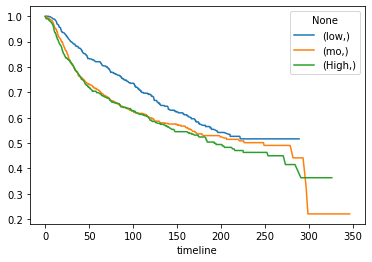

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic      p  -log2(p)
          16.49 <0.005     14.32
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.32 0.57      0.81
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic      p  -log2(p)
          18.93 <0.005     16.17


In [141]:
kmf = KaplanMeierFitter()

f = metabric_df_RF['stat'] =='Epi'
T = metabric_df_RF[f]['Relapse Free Status (Months)']
C = metabric_df_RF[f]['status']

f2 = metabric_df_RF['stat']=='Hybrid'
T2 = metabric_df_RF[f2]['Relapse Free Status (Months)']
C2 = metabric_df_RF[f2]['status']

f3 = metabric_df_RF['stat']=='Mes'
T3 = metabric_df_RF[f3]['Relapse Free Status (Months)']
C3 = metabric_df_RF[f3]['status']

ax = plt.subplot(111)

kmf.fit(T, event_observed=C, label=['low'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T2, event_observed=C2, label=['mo'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T3, event_observed=C3, label=['High'])
kmf.survival_function_.plot(ax=ax)

kmf2 = plt.gcf()
plt.show()
results = logrank_test(T, T2, C, C2, alpha=.95,weightings="wilcoxon")
print(results)


results = logrank_test(T3, T2, C3, C2, alpha=.95,weightings="wilcoxon")
print(results)

results = logrank_test(T, T3, C, C3, alpha=.95,weightings="wilcoxon")
print(results)

In [134]:
from lifelines import CoxPHFitter

dfA = pd.DataFrame({'E': C, 'T': T, 'groupA': 1})
dfB = pd.DataFrame({'E': C2, 'T': T2, 'groupA': 0})
df = pd.concat([dfA, dfB])

cph = CoxPHFitter().fit(df, 'T', 'E')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1328 total observations, 812 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 1328
number of events observed = 516
   partial log-likelihood = -3466.96
         time fit was run = 2022-06-03 18:31:41 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
groupA     -0.25       0.78       0.09            -0.43            -0.08                 0.65                 0.93

              z      p   -log2(p)
covariate                        
groupA    -2.82 <0.005       7.69
---
Concordance = 0.55
Partial AIC = 6935.91
log-likelihood ratio test = 8.03 on 1 df
-log2(p) of ll-ratio test = 7.77

In [132]:
T

Sample ID
MB-0008     18.55
MB-0036    123.32
MB-0045    105.99
MB-0050     74.34
MB-0066    155.36
            ...  
MB-7276    182.89
MB-7279     19.08
MB-7287     63.29
MB-7293    196.61
MB-7294     81.64
Name: Relapse Free Status (Months), Length: 605, dtype: float64

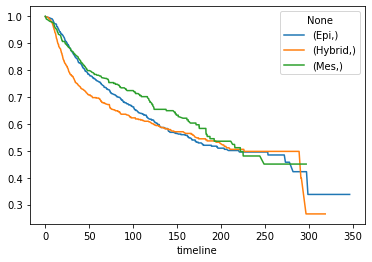

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           6.05 0.01      6.17
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic      p  -log2(p)
           8.66 <0.005      8.26
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           1.79 0.18      2.46


In [147]:
kmf = KaplanMeierFitter()

f = metabric_df_RF['stat'] =='Epi'
T = metabric_df_RF[f]['Relapse Free Status (Months)']
C = metabric_df_RF[f]['status']

f2 = metabric_df_RF['stat']=='Hybrid'
T2 = metabric_df_RF[f2]['Relapse Free Status (Months)']
C2 = metabric_df_RF[f2]['status']

f3 = metabric_df_RF['stat']=='Mes'
T3 = metabric_df_RF[f3]['Relapse Free Status (Months)']
C3 = metabric_df_RF[f3]['status']

ax = plt.subplot(111)

kmf.fit(T, event_observed=C, label=['Epi'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T2, event_observed=C2, label=['Hybrid'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T3, event_observed=C3, label=['Mes'])
kmf.survival_function_.plot(ax=ax)

kmf2 = plt.gcf()
plt.show()
results = logrank_test(T, T2, C, C2, alpha=.95,weightings="wilcoxon")
print(results)


results = logrank_test(T3, T2, C3, C2, alpha=.95,weightings="wilcoxon")
print(results)

results = logrank_test(T, T3, C, C3, alpha=.95,weightings="wilcoxon")
print(results)

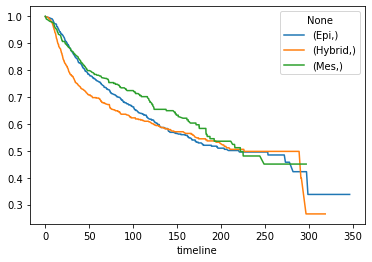

<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           3.38 0.07      3.92
<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           6.54 0.01      6.57
<lifelines.StatisticalResult: Tarone-Ware_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Tarone-Ware_test

---
 test_statistic    p  -log2(p)
           1.88 0.17      2.55


In [148]:
kmf = KaplanMeierFitter()

f = metabric_df_RF['stat'] =='Epi'
T = metabric_df_RF[f]['Relapse Free Status (Months)']
C = metabric_df_RF[f]['status']

f2 = metabric_df_RF['stat']=='Hybrid'
T2 = metabric_df_RF[f2]['Relapse Free Status (Months)']
C2 = metabric_df_RF[f2]['status']

f3 = metabric_df_RF['stat']=='Mes'
T3 = metabric_df_RF[f3]['Relapse Free Status (Months)']
C3 = metabric_df_RF[f3]['status']

ax = plt.subplot(111)

kmf.fit(T, event_observed=C, label=['Epi'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T2, event_observed=C2, label=['Hybrid'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T3, event_observed=C3, label=['Mes'])
kmf.survival_function_.plot(ax=ax)

kmf2 = plt.gcf()
plt.show()
results = logrank_test(T, T2, C, C2, alpha=.95,weightings="tarone-ware")
print(results)


results = logrank_test(T3, T2, C3, C2, alpha=.95,weightings="tarone-ware")
print(results)

results = logrank_test(T, T3, C, C3, alpha=.95,weightings="tarone-ware")
print(results)

# loading gene lists

NameError: name 'event_observed_A' is not defined

In [60]:
final_1_vs_rest_share_genes = pd.read_csv('/mnt/ibm_sm/home/weilun/code/data/scBC_data/files/DEGs/JAN2022_SS2_MULTI_1_vs_others_shared_genes_TNBC.csv')

In [61]:
low_genes = [x for x in final_1_vs_rest_share_genes['low_overlap'].tolist() if str(x) != 'nan']
int_genes = [x for x in final_1_vs_rest_share_genes['intermediate_overlap'].tolist() if str(x) != 'nan']
high_genes = [x for x in final_1_vs_rest_share_genes['high_overlap'].tolist() if str(x) != 'nan']

In [62]:
final_EMT_share_genes = pd.read_csv('/mnt/ibm_sm/home/weilun/code/data/scBC_data/files/DEGs/EMT_SS2_10X_shared_genes.csv')

In [63]:
final_EMT_share_genes

,Unnamed: 0,Epithelial-like,EMT Intermediate,Mesenchymal-like
0,0,GATA3,CRYAB,CYBA
1,1,PBX1,KRT15,GJA1
2,2,AGR2,CD24,TSPAN4
3,3,TFF3,CALML5,MGP
4,4,KRT8,S100A2,TRPS1
...,...,...,...,...
127,127,NaN,NaN,CCDC88A
128,128,NaN,NaN,RPL18A
129,129,NaN,NaN,FABP7
130,130,NaN,NaN,PGM1


In [64]:
E_genes = [x for x in final_EMT_share_genes['Epithelial-like'].tolist() if str(x) != 'nan']
H_genes = [x for x in final_EMT_share_genes['EMT Intermediate'].tolist() if str(x) != 'nan']
M_genes = [x for x in final_EMT_share_genes[:100]['Mesenchymal-like'].tolist() if str(x) != 'nan']

In [210]:
temp_test = metabric_df_RF.copy()
metabric_df_RF

,Relapse Free Status (Months),Relapse Free Status,status,Epi_stat,stat,PAM50_subtype,low_stat
Sample ID,,,,,,,
MB-0000,138.65,0:Not Recurred,0.0,high,Hybrid,claudin-low,high
MB-0002,83.52,0:Not Recurred,0.0,high,Mes,LumA,high
MB-0005,151.28,1:Recurred,1.0,high,Mes,LumB,mo
MB-0006,162.76,0:Not Recurred,0.0,high,Hybrid,LumB,mo
MB-0008,18.55,1:Recurred,1.0,high,Epi,LumB,low
...,...,...,...,...,...,...,...
MB-7295,194.28,0:Not Recurred,0.0,high,Mes,LumA,high
MB-7296,16.09,1:Recurred,1.0,high,Epi,LumB,mo
MB-7297,121.18,1:Recurred,1.0,low,Epi,LumB,mo


In [211]:
for i in metabric_df_RF.index:
    metabric_df_RF.loc[i, 'PAM50_subtype'] = metabric_metadata_df.loc[i, 'Pam50 + Claudin-low subtype']
metabric_df_RF

,Relapse Free Status (Months),Relapse Free Status,status,Epi_stat,stat,PAM50_subtype,low_stat
Sample ID,,,,,,,
MB-0000,138.65,0:Not Recurred,0.0,high,Hybrid,claudin-low,high
MB-0002,83.52,0:Not Recurred,0.0,high,Mes,LumA,high
MB-0005,151.28,1:Recurred,1.0,high,Mes,LumB,mo
MB-0006,162.76,0:Not Recurred,0.0,high,Hybrid,LumB,mo
MB-0008,18.55,1:Recurred,1.0,high,Epi,LumB,low
...,...,...,...,...,...,...,...
MB-7295,194.28,0:Not Recurred,0.0,high,Mes,LumA,high
MB-7296,16.09,1:Recurred,1.0,high,Epi,LumB,mo
MB-7297,121.18,1:Recurred,1.0,low,Epi,LumB,mo


In [195]:
cat_order = ['Mes','Hybrid','Epi']

metabric_df_RF['stat'] = pd.Categorical(metabric_df_RF['stat'], categories=cat_order, ordered=True)

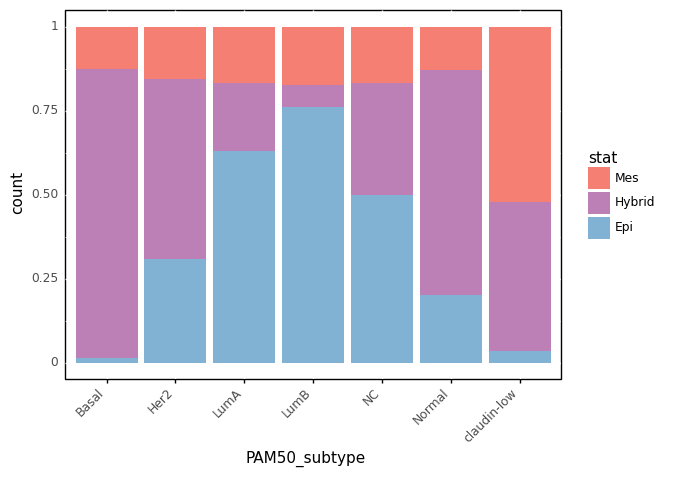

<ggplot: (8731079403584)>

In [199]:
plot_ref = (ggplot(metabric_df_RF, aes(x='PAM50_subtype',fill='stat')) 
                + geom_bar( position='fill') 
                + scale_fill_manual(['#F47F72','#BC80B7','#81B1D3'])
                + theme(axis_text_x=element_text(rotation=45, hjust=1), 
                        plot_background=element_rect(fill='white', alpha=.3),
                        panel_background=element_rect(fill='white', alpha=.2),
                        panel_border=element_rect(color='black', size=1),
                        axis_ticks_major_y=element_blank()))
plot_ref

In [221]:
cat_order = ['high','mo','low']

metabric_df_RF['low_stat'] = pd.Categorical(metabric_df_RF['low_stat'], categories=cat_order, ordered=True)

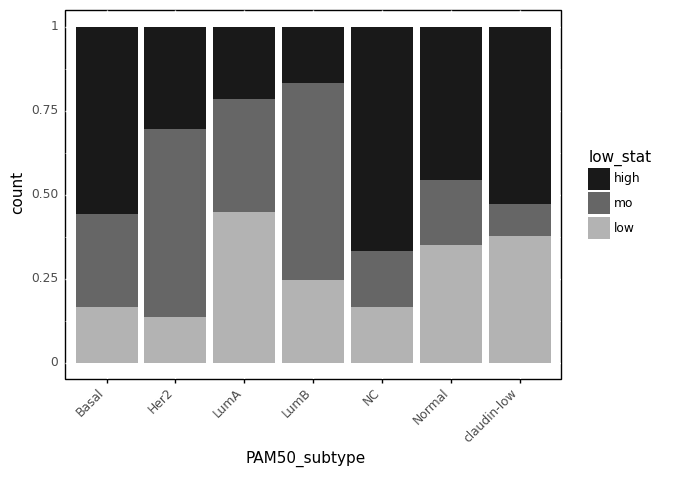

<ggplot: (8731079205205)>

In [223]:
plot_ref = (ggplot(metabric_df_RF, aes(x='PAM50_subtype',fill='low_stat')) 
                + geom_bar( position='fill') 
                + scale_fill_manual(['#191919','#666666','#B3B3B3'])
                + theme(axis_text_x=element_text(rotation=45, hjust=1), 
                        plot_background=element_rect(fill='white', alpha=.3),
                        panel_background=element_rect(fill='white', alpha=.2),
                        panel_border=element_rect(color='black', size=1),
                        axis_ticks_major_y=element_blank()))
plot_ref

In [224]:
test = metabric_df_RF[metabric_df_RF['PAM50_subtype'] != 'NC']
test

,Relapse Free Status (Months),Relapse Free Status,status,Epi_stat,stat,PAM50_subtype,low_stat
Sample ID,,,,,,,
MB-0000,138.65,0:Not Recurred,0.0,high,Hybrid,claudin-low,high
MB-0002,83.52,0:Not Recurred,0.0,high,Mes,LumA,high
MB-0005,151.28,1:Recurred,1.0,high,Mes,LumB,mo
MB-0006,162.76,0:Not Recurred,0.0,high,Hybrid,LumB,mo
MB-0008,18.55,1:Recurred,1.0,high,Epi,LumB,low
...,...,...,...,...,...,...,...
MB-7295,194.28,0:Not Recurred,0.0,high,Mes,LumA,high
MB-7296,16.09,1:Recurred,1.0,high,Epi,LumB,mo
MB-7297,121.18,1:Recurred,1.0,low,Epi,LumB,mo


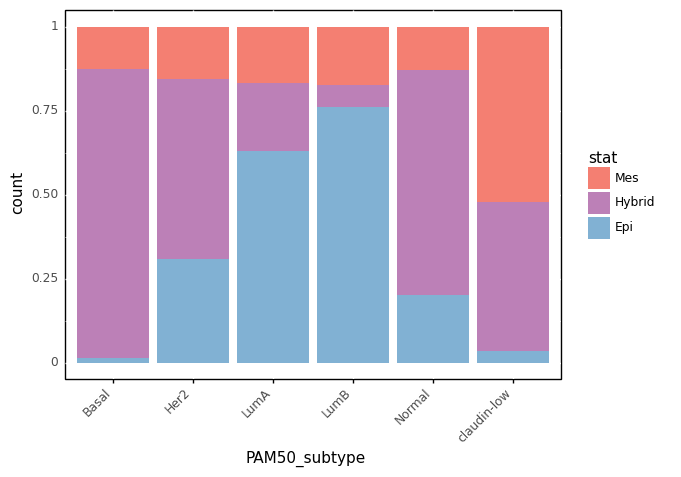

<ggplot: (8731177924431)>

In [225]:
plot_ref = (ggplot(test, aes(x='PAM50_subtype',fill='stat')) 
                + geom_bar( position='fill') 
                + scale_fill_manual(['#F47F72','#BC80B7','#81B1D3'])
                + theme(axis_text_x=element_text(rotation=45, hjust=1), 
                        plot_background=element_rect(fill='white', alpha=.3),
                        panel_background=element_rect(fill='white', alpha=.2),
                        panel_border=element_rect(color='black', size=1),
                        axis_ticks_major_y=element_blank()))
plot_ref

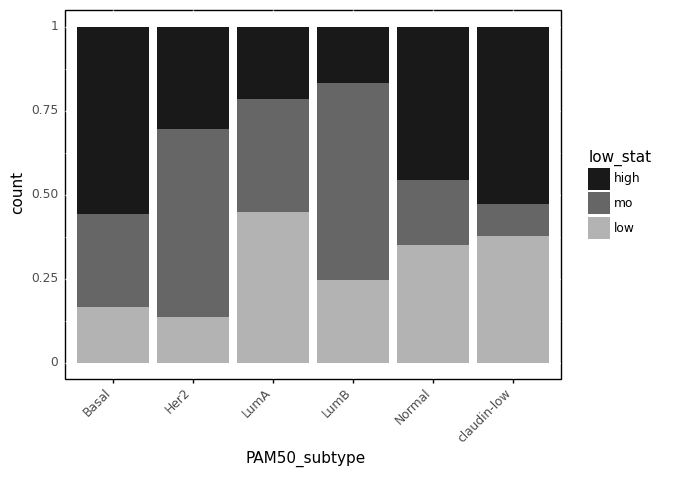

<ggplot: (8731081709891)>

In [226]:
plot_ref = (ggplot(test, aes(x='PAM50_subtype',fill='low_stat')) 
                + geom_bar( position='fill') 
                + scale_fill_manual(['#191919','#666666','#B3B3B3'])
                + theme(axis_text_x=element_text(rotation=45, hjust=1), 
                        plot_background=element_rect(fill='white', alpha=.3),
                        panel_background=element_rect(fill='white', alpha=.2),
                        panel_border=element_rect(color='black', size=1),
                        axis_ticks_major_y=element_blank()))
plot_ref

In [227]:
test

,Relapse Free Status (Months),Relapse Free Status,status,Epi_stat,stat,PAM50_subtype,low_stat
Sample ID,,,,,,,
MB-0000,138.65,0:Not Recurred,0.0,high,Hybrid,claudin-low,high
MB-0002,83.52,0:Not Recurred,0.0,high,Mes,LumA,high
MB-0005,151.28,1:Recurred,1.0,high,Mes,LumB,mo
MB-0006,162.76,0:Not Recurred,0.0,high,Hybrid,LumB,mo
MB-0008,18.55,1:Recurred,1.0,high,Epi,LumB,low
...,...,...,...,...,...,...,...
MB-7295,194.28,0:Not Recurred,0.0,high,Mes,LumA,high
MB-7296,16.09,1:Recurred,1.0,high,Epi,LumB,mo
MB-7297,121.18,1:Recurred,1.0,low,Epi,LumB,mo


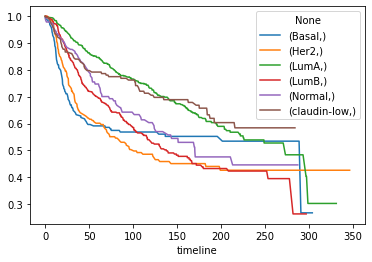

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.00 0.97      0.05
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic      p  -log2(p)
          65.47 <0.005     50.59
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic      p  -log2(p)
          47.10 <0.005     37.11


In [230]:
kmf = KaplanMeierFitter()

f = test['PAM50_subtype'] =='Basal'
T = test[f]['Relapse Free Status (Months)']
C = test[f]['status']

f2 = test['PAM50_subtype']=='Her2'
T2 = test[f2]['Relapse Free Status (Months)']
C2 = test[f2]['status']

f3 = test['PAM50_subtype']=='LumA'
T3 = test[f3]['Relapse Free Status (Months)']
C3 = test[f3]['status']

f4 = test['PAM50_subtype']=='LumB'
T4 = test[f4]['Relapse Free Status (Months)']
C4 = test[f4]['status']

f5 = test['PAM50_subtype']=='Normal'
T5 = test[f5]['Relapse Free Status (Months)']
C5 = test[f5]['status']

f6 = test['PAM50_subtype']=='claudin-low'
T6 = test[f6]['Relapse Free Status (Months)']
C6 = test[f6]['status']
ax = plt.subplot(111)

kmf.fit(T, event_observed=C, label=['Basal'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T2, event_observed=C2, label=['Her2'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T3, event_observed=C3, label=['LumA'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T4, event_observed=C4, label=['LumB'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T5, event_observed=C5, label=['Normal'])
kmf.survival_function_.plot(ax=ax)
kmf.fit(T6, event_observed=C6, label=['claudin-low'])
kmf.survival_function_.plot(ax=ax)

kmf2 = plt.gcf()
plt.show()
results = logrank_test(T, T2, C, C2, alpha=.95,weightings="wilcoxon")
print(results)


results = logrank_test(T3, T2, C3, C2, alpha=.95,weightings="wilcoxon")
print(results)

results = logrank_test(T, T3, C, C3, alpha=.95,weightings="wilcoxon")
print(results)

# KM plot

Basal


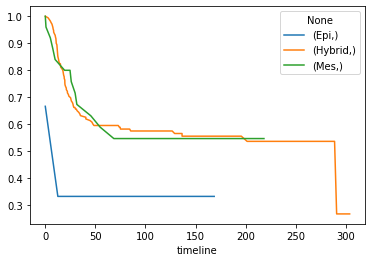

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           3.32 0.07      3.87
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.00 0.99      0.01
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           2.26 0.13      2.91
----------------------------------------------------------------------------------------------------
totoal:  199 low:  3 mo:  171 high:  25
Her2


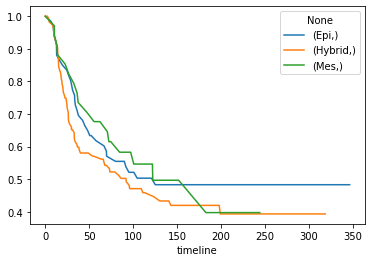

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           1.20 0.27      1.87
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           1.43 0.23      2.11
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.19 0.66      0.60
----------------------------------------------------------------------------------------------------
totoal:  220 low:  68 mo:  118 high:  34
LumA


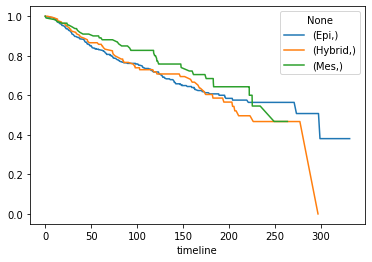

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.08 0.78      0.35
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           1.73 0.19      2.40
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           2.78 0.10      3.39
----------------------------------------------------------------------------------------------------
totoal:  678 low:  426 mo:  138 high:  114
LumB


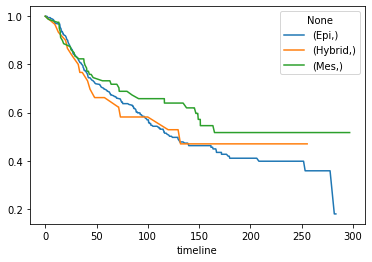

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.02 0.88      0.19
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.63 0.43      1.22
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           1.35 0.25      2.02
----------------------------------------------------------------------------------------------------
totoal:  461 low:  351 mo:  30 high:  80
NC


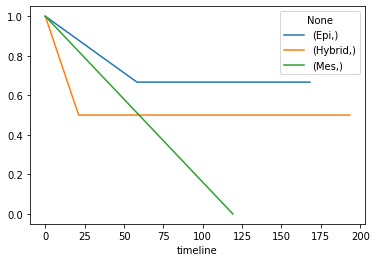

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.44 0.50      0.99
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.00 1.00     -0.00
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.00 1.00     -0.00
----------------------------------------------------------------------------------------------------
totoal:  6 low:  3 mo:  2 high:  1
Normal


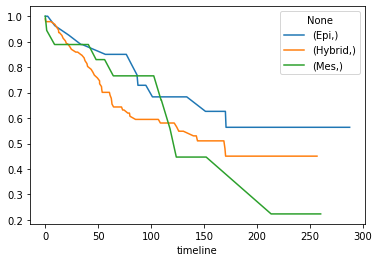

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           2.14 0.14      2.80
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.35 0.55      0.86
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.37 0.54      0.89
----------------------------------------------------------------------------------------------------
totoal:  140 low:  28 mo:  94 high:  18
claudin-low


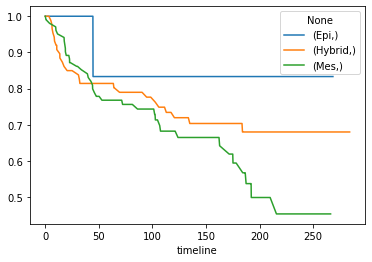

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.56 0.46      1.13
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.36 0.55      0.87
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.87 0.35      1.50
----------------------------------------------------------------------------------------------------
totoal:  199 low:  7 mo:  88 high:  104


In [169]:
for i in ['Basal', 'Her2', 'LumA', 'LumB', 'NC', 'Normal', 'claudin-low']:
    print(i)
    metabric_metadata_df_filtered = metabric_metadata_df[metabric_metadata_df['Pam50 + Claudin-low subtype'] == i]
    metabric_gc_filtered = metabric_gc_rf[metabric_gc_rf.index.isin(metabric_metadata_df_filtered.index)]
    metabric_df_RF_filtered = metabric_df_RF[metabric_df_RF.index.isin(metabric_metadata_df_filtered.index)]

    kmf = KaplanMeierFitter()

    f = metabric_df_RF_filtered['stat']=='Epi'
    T = metabric_df_RF_filtered[f]['Relapse Free Status (Months)']
    C = metabric_df_RF_filtered[f]['status']
    
    f2 = metabric_df_RF_filtered['stat']=='Hybrid'
    T2 = metabric_df_RF_filtered[f2]['Relapse Free Status (Months)']
    C2 = metabric_df_RF_filtered[f2]['status']

    f3 = metabric_df_RF_filtered['stat']=='Mes'
    T3 = metabric_df_RF_filtered[f3]['Relapse Free Status (Months)']
    C3 = metabric_df_RF_filtered[f3]['status']

    ax = plt.subplot(111)

    kmf.fit(T, event_observed=C, label=['Epi'])
    kmf.survival_function_.plot(ax=ax)
    kmf.fit(T2, event_observed=C2, label=['Hybrid'])
    kmf.survival_function_.plot(ax=ax)
    kmf.fit(T3, event_observed=C3, label=['Mes'])
    kmf.survival_function_.plot(ax=ax)

    kmf2 = plt.gcf()
    plt.show()
    results = logrank_test(T, T2, C, C2, alpha=.95,weightings="wilcoxon")
    print(results)


    results = logrank_test(T3, T2, C3, C2, alpha=.95,weightings="wilcoxon")
    print(results)

    results = logrank_test(T, T3, C, C3, alpha=.95,weightings="wilcoxon")
    print(results)
    print('-'*100)
    print("totoal: ", len(metabric_df_RF_filtered), 'low: ', len(T), 'mo: ', len(T2), 'high: ', len(T3))

Basal


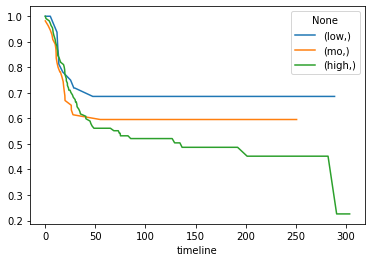

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.99 0.32      1.65
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.02 0.88      0.18
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           1.72 0.19      2.40
----------------------------------------------------------------------------------------------------
totoal:  199 low:  33 mo:  55 high:  111
Her2


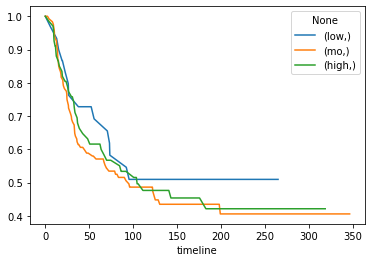

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.81 0.37      1.44
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.19 0.66      0.59
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.35 0.55      0.85
----------------------------------------------------------------------------------------------------
totoal:  220 low:  30 mo:  123 high:  67
LumA


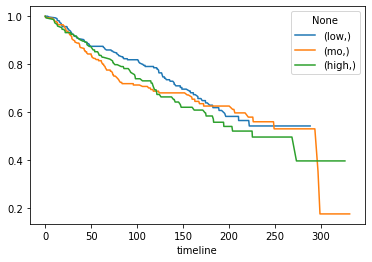

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           3.16 0.08      3.73
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.06 0.81      0.31
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           1.72 0.19      2.40
----------------------------------------------------------------------------------------------------
totoal:  678 low:  304 mo:  227 high:  147
LumB


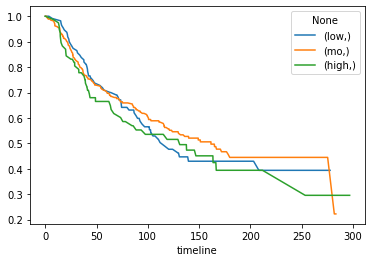

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.04 0.84      0.25
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.80 0.37      1.43
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.64 0.42      1.23
----------------------------------------------------------------------------------------------------
totoal:  461 low:  113 mo:  271 high:  77
NC


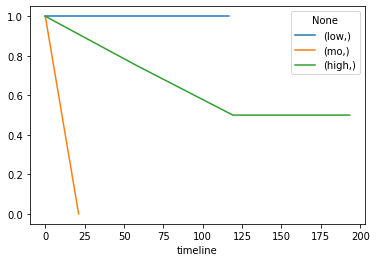

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           1.00 0.32      1.66
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           4.00 0.05      4.46
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.25 0.62      0.70
----------------------------------------------------------------------------------------------------
totoal:  6 low:  1 mo:  1 high:  4
Normal


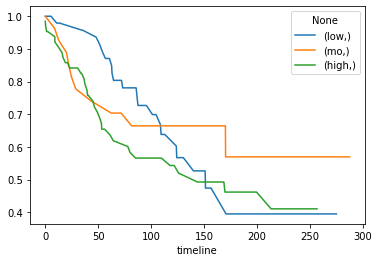

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.17 0.68      0.56
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.75 0.39      1.37
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           3.52 0.06      4.04
----------------------------------------------------------------------------------------------------
totoal:  140 low:  49 mo:  27 high:  64
claudin-low


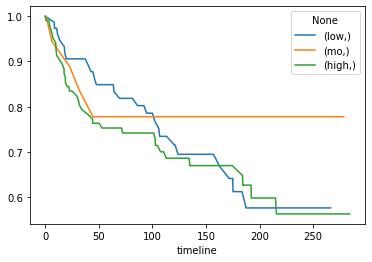

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.07 0.79      0.33
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.54 0.46      1.11
<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.80 0.37      1.43
----------------------------------------------------------------------------------------------------
totoal:  199 low:  75 mo:  19 high:  105


In [162]:
for i in ['Basal', 'Her2', 'LumA', 'LumB', 'NC', 'Normal', 'claudin-low']:
    print(i)
    metabric_metadata_df_filtered = metabric_metadata_df[metabric_metadata_df['Pam50 + Claudin-low subtype'] == i]
    metabric_gc_filtered = metabric_gc_rf[metabric_gc_rf.index.isin(metabric_metadata_df_filtered.index)]
    metabric_df_RF_filtered = metabric_df_RF[metabric_df_RF.index.isin(metabric_metadata_df_filtered.index)]

    kmf = KaplanMeierFitter()

    f = metabric_df_RF_filtered['stat']=='Epi'
    T = metabric_df_RF_filtered[f]['Relapse Free Status (Months)']
    C = metabric_df_RF_filtered[f]['status']
    
    f2 = metabric_df_RF_filtered['stat']=='Hybrid'
    T2 = metabric_df_RF_filtered[f2]['Relapse Free Status (Months)']
    C2 = metabric_df_RF_filtered[f2]['status']

    f3 = metabric_df_RF_filtered['stat']=='Mes'
    T3 = metabric_df_RF_filtered[f3]['Relapse Free Status (Months)']
    C3 = metabric_df_RF_filtered[f3]['status']

    ax = plt.subplot(111)

    kmf.fit(T, event_observed=C, label=['low'])
    kmf.survival_function_.plot(ax=ax)
    kmf.fit(T2, event_observed=C2, label=['mo'])
    kmf.survival_function_.plot(ax=ax)
    kmf.fit(T3, event_observed=C3, label=['high'])
    kmf.survival_function_.plot(ax=ax)

    kmf2 = plt.gcf()
    plt.show()
    results = logrank_test(T, T2, C, C2, alpha=.95,weightings="wilcoxon")
    print(results)


    results = logrank_test(T3, T2, C3, C2, alpha=.95,weightings="wilcoxon")
    print(results)

    results = logrank_test(T, T3, C, C3, alpha=.95,weightings="wilcoxon")
    print(results)
    print('-'*100)
    print("totoal: ", len(metabric_df_RF_filtered), 'low: ', len(T), 'mo: ', len(T2), 'high: ', len(T3))

Basal
E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


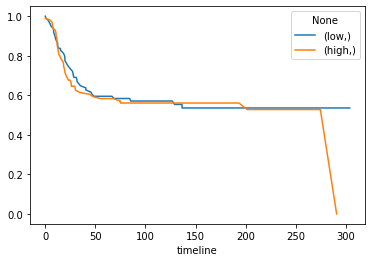

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.10 0.75      0.41
H_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


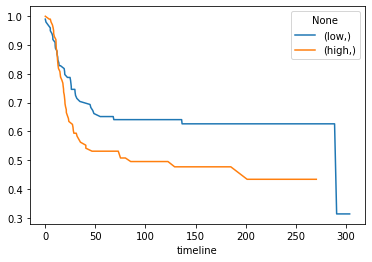

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           3.33 0.07      3.88
M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


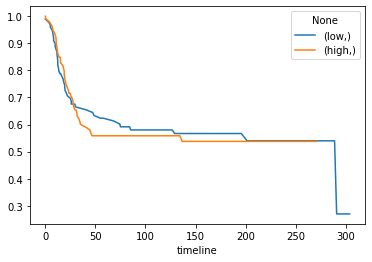

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.01 0.94      0.09
----------------------------------------------------------------------------------------------------
Her2
E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


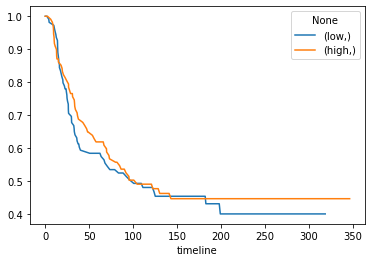

/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.25 0.62      0.69
H_genes


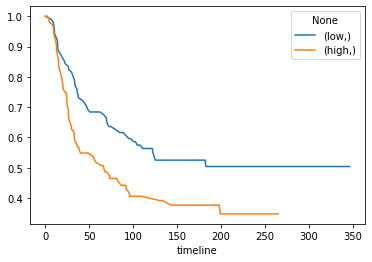

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           7.04 0.01      6.97
M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


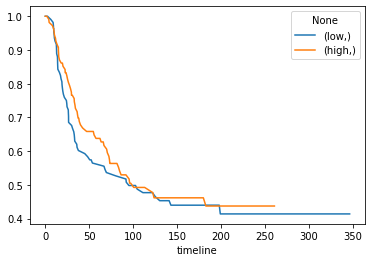

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.88 0.35      1.53
----------------------------------------------------------------------------------------------------
LumA


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


E_genes


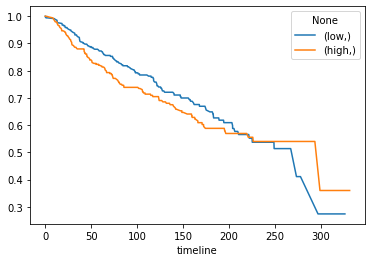

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           3.46 0.06      3.99
H_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


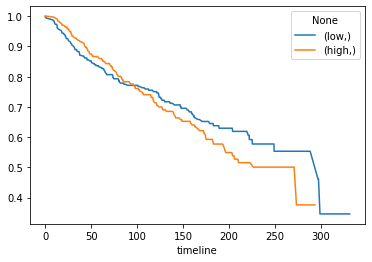

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.00 0.98      0.03
M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


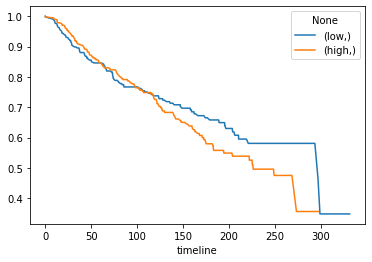

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.06 0.81      0.30
----------------------------------------------------------------------------------------------------
LumB
E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


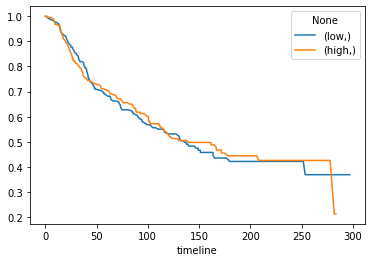

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.00 0.95      0.08
H_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


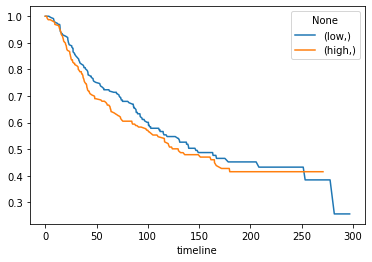

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           1.51 0.22      2.19
M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


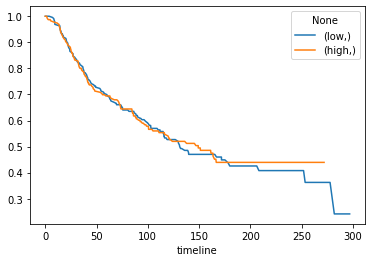

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.00 0.97      0.05
----------------------------------------------------------------------------------------------------
NC
E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


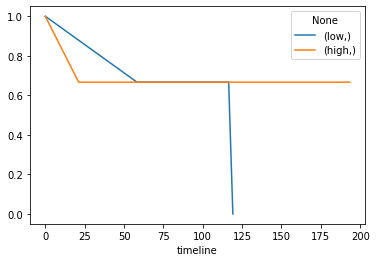

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.06 0.81      0.31
H_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


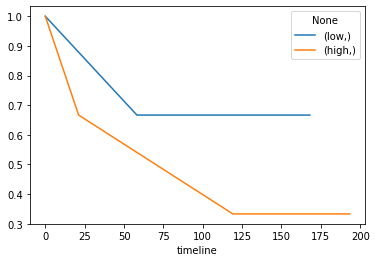

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.24 0.63      0.67
M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


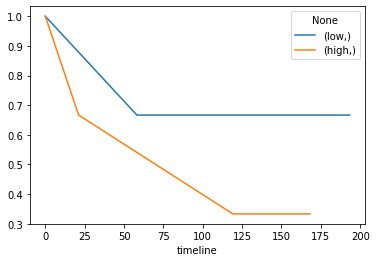

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.24 0.63      0.67
----------------------------------------------------------------------------------------------------
Normal
E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


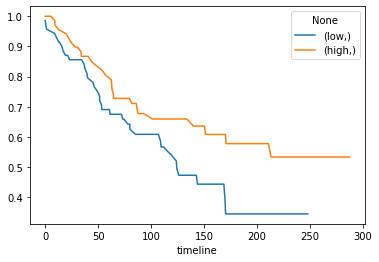

/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           2.60 0.11      3.22
H_genes


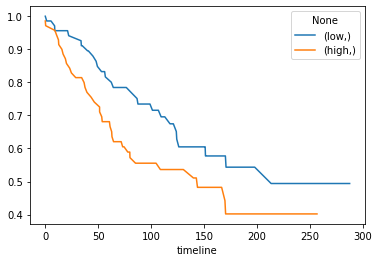

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           4.26 0.04      4.68
M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


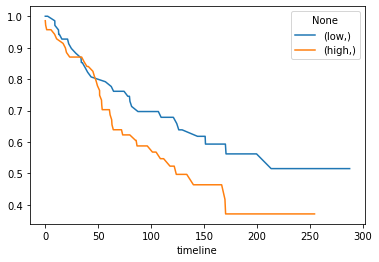

/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           2.24 0.13      2.89
----------------------------------------------------------------------------------------------------
claudin-low
E_genes


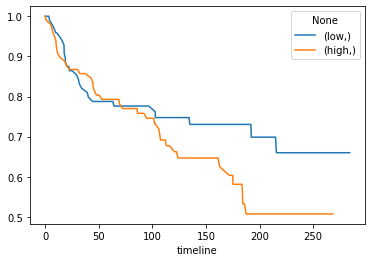

/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.73 0.39      1.34
H_genes


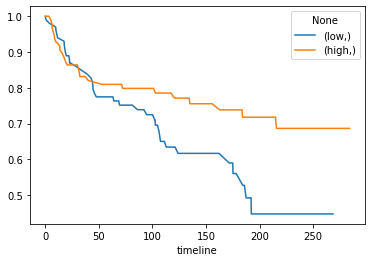

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           1.89 0.17      2.57
M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


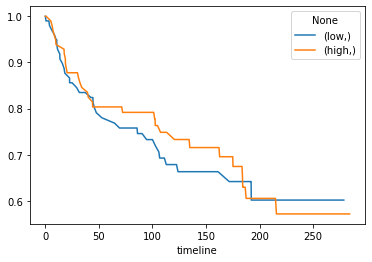

<lifelines.StatisticalResult: Wilcoxon_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = Wilcoxon_test

---
 test_statistic    p  -log2(p)
           0.31 0.58      0.79
----------------------------------------------------------------------------------------------------


In [65]:
for i in ['Basal', 'Her2', 'LumA', 'LumB', 'NC', 'Normal', 'claudin-low']:
    print(i)
    metabric_metadata_df_filtered = metabric_metadata_df[metabric_metadata_df['Pam50 + Claudin-low subtype'] == i]
    metabric_gc_filtered = metabric_gc_rf[metabric_gc_rf.index.isin(metabric_metadata_df_filtered.index)]
    metabric_df_RF_filtered = metabric_df_RF[metabric_df_RF.index.isin(metabric_metadata_df_filtered.index)]
    for j, name in zip([E_genes,H_genes,M_genes],['E_genes','H_genes','M_genes']):
    #for j, name in zip([H_genes],['H_genes']):
        temp_genes = [x for x in j if str(x) in metabric_gc_filtered.columns.tolist()]
        metabric_gc_filtered_temp = metabric_gc_filtered[temp_genes]
        metabric_gc_filtered_temp = metabric_gc_filtered_temp.mean(axis=1)
        metabric_gc_filtered_temp = metabric_gc_filtered_temp.to_frame()
        for z in metabric_gc_filtered_temp.index:
            if metabric_gc_filtered_temp.loc[z, 0] < metabric_gc_filtered_temp[0].median():
                metabric_df_RF_filtered.loc[z, 'cat'] = 'low'
            elif metabric_gc_filtered_temp.loc[z, 0] > metabric_gc_filtered_temp[0].median():
                metabric_df_RF_filtered.loc[z, 'cat'] = 'high'
        print(name)
        kmf = KaplanMeierFitter()

        f = metabric_df_RF_filtered.cat=='low'
        T = metabric_df_RF_filtered[f]['Relapse Free Status (Months)']
        C = metabric_df_RF_filtered[f]['status']

        f2 = metabric_df_RF_filtered.cat=='high'
        T2 = metabric_df_RF_filtered[f2]['Relapse Free Status (Months)']
        C2 = metabric_df_RF_filtered[f2]['status']

        ax = plt.subplot(111)

        kmf.fit(T, event_observed=C, label=['low'])
        kmf.survival_function_.plot(ax=ax)
        kmf.fit(T2, event_observed=C2, label=['high'])
        kmf.survival_function_.plot(ax=ax)

        kmf2 = plt.gcf()
        plt.show()
        results = logrank_test(T, T2, C, C2, alpha=.95,weightings="wilcoxon")
        print(results)
    print('-'*100)

In [79]:
p_value_df = pd.DataFrame()
for i in ['Basal', 'Her2', 'LumA', 'LumB', 'NC', 'Normal', 'claudin-low']:
    print(i)
    metabric_metadata_df_filtered = metabric_metadata_df[metabric_metadata_df['Pam50 + Claudin-low subtype'] == i]
    metabric_gc_filtered = metabric_gc_rf[metabric_gc_rf.index.isin(metabric_metadata_df_filtered.index)]
    metabric_df_RF_filtered = metabric_df_RF[metabric_df_RF.index.isin(metabric_metadata_df_filtered.index)]
    #for j, name in zip([H_genes],['H_genes']):
    for j, name in zip([E_genes,H_genes,M_genes],['E_genes','H_genes','M_genes']):
        temp_genes = [x for x in j if str(x) in metabric_gc_filtered.columns.tolist()]
        expression_df_filtered = metabric_gc_filtered[temp_genes]
        expression_df_filtered = expression_df_filtered.mean(axis=1)
        expression_df_filtered = expression_df_filtered.to_frame()
        for z in expression_df_filtered.index:
            if expression_df_filtered.loc[z, 0] < expression_df_filtered[0].median():
                metabric_df_RF_filtered.loc[z, 'cat'] = 'low'
            elif expression_df_filtered.loc[z, 0] > expression_df_filtered[0].median():
                metabric_df_RF_filtered.loc[z, 'cat'] = 'high'

        print(name)
        kmf = KaplanMeierFitter()

        kmf_df = pd.DataFrame()
        for cat in ['low','high']:
            f = metabric_df_RF_filtered.cat==cat
            T = metabric_df_RF_filtered[f]['Relapse Free Status (Months)']
            C = metabric_df_RF_filtered[f]['status']
            kmf.fit(T, event_observed=C, label=['RFS'])
            temp_df = kmf.survival_function_.reset_index()
            temp_df['label'] = cat
            kmf_df = kmf_df.append(temp_df)
            
        f = metabric_df_RF_filtered['cat']=='low'
        T = metabric_df_RF_filtered[f]['Relapse Free Status (Months)']
        C = metabric_df_RF_filtered[f]['status']

        f2 = metabric_df_RF_filtered['cat']=='high'
        T2 = metabric_df_RF_filtered[f2]['Relapse Free Status (Months)']
        C2 = metabric_df_RF_filtered[f2]['status']


        results = logrank_test(T, T2, C, C2, alpha=.95)
    
        p_value_df[name+'_'+i] = [results.p_value]
            
        plot1 = (ggplot(kmf_df)
        + theme_bw()
        + geom_step(aes('timeline','RFS',group='label',color='label'))+ ylim(0, 1)
         +scale_color_manual({'low':'black', 'high':'red'})
         +theme(
          strip_background=element_blank(), strip_text_x=element_blank(),
          plot_background=element_rect(fill='white', alpha=.3),panel_background=element_rect(fill='white', alpha=.2),figure_size=(5, 5),
          panel_border = element_rect(colour = "black", fill=None, size=1),panel_grid_major = element_blank(),panel_grid_minor = element_blank()
          ))
        
        save_as_pdf_pages([plot1],'metabric_'+name+'_'+i+'_ref.pdf')
        
        plot2 = (ggplot(kmf_df)
        + theme_bw()
        + geom_step(aes('timeline','RFS',group='label',color='label'),show_legend = False,size=1.8)+ ylim(0, 1)
         +scale_color_manual({'low':'black', 'high':'red'})
         +theme(axis_text_x=element_blank(),axis_text_y=element_blank(),axis_title_x=element_blank(),axis_title_y=element_blank(),
          strip_background=element_blank(), strip_text_x=element_blank(),
          plot_background=element_rect(fill='white', alpha=.3),panel_background=element_rect(fill='white', alpha=.2),figure_size=(5, 5),
          panel_border = element_rect(colour = "black", fill=None, size=1),panel_grid_major = element_blank(),panel_grid_minor = element_blank()
          ))
        save_as_pdf_pages([plot2],'metabric_'+name+'_'+i+'.pdf')

    print('-'*100)

Basal
E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_Basal_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_Basal.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


H_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_Basal_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_Basal.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_Basal_ref.pdf


M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_Basal.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


----------------------------------------------------------------------------------------------------
Her2
E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_Her2_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_Her2.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_Her2_ref.pdf


H_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_Her2.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_Her2_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_Her2.pdf


----------------------------------------------------------------------------------------------------
LumA


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_LumA_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_LumA.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


H_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_LumA_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_LumA.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_LumA_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_LumA.pdf


----------------------------------------------------------------------------------------------------
LumB
E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_LumB_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_LumB.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


H_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_LumB_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_LumB.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_LumB_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_LumB.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


----------------------------------------------------------------------------------------------------
NC
E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_NC_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_NC.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


H_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_NC_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_NC.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_NC_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_NC.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


----------------------------------------------------------------------------------------------------
Normal
E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_Normal_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_Normal.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


H_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_Normal_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_Normal.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


M_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_Normal_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_Normal.pdf


----------------------------------------------------------------------------------------------------
claudin-low
E_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_claudin-low_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_E_genes_claudin-low.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

H_genes


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_claudin-low_ref.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_H_genes_claudin-low.pdf
/home/weilun/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_claudin-low_ref.pdf


M_genes
----------------------------------------------------------------------------------------------------


/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: metabric_M_genes_claudin-low.pdf


In [77]:
p_value_df.to_csv('p_values.csv')